<a href="https://colab.research.google.com/github/Shivesh-1999/Business-Analysis-Project/blob/main/Regression_Usedcar_Price_Worksheet_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression: Predicting Resale Price of an Used Car

This notebook introduces the steps to build a regression model to predict the resale price of an used car.

### Dataset

**Filename**: final_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).


## 1. Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
cars_df = pd.read_csv('/final_cars_maruti.csv')

In [ ]:
cars_df.head(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


In [ ]:
cars_df.shape

(1009, 11)

### Relationship between Age and Price

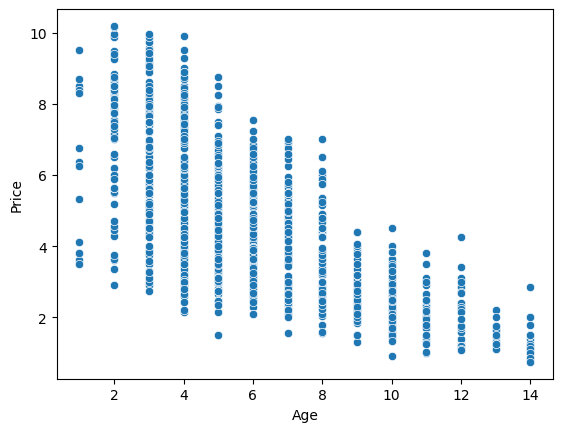

In [ ]:
sn.scatterplot(data = cars_df,
               y = 'Price',
               x = 'Age');

## 2. Simple Linear Regression

Assumes linear relationship between features and outcome variable.

Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X$

- $\beta_{0}$ and $\beta_{1}$ are the regression coefficients
- $\hat{Y}$ is the predicted value of ${Y}$.


So, the error (Mean Squared Error) is:

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\hat{Y}))}^2$

or

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))}^2$




Regression Explained: https://mlu-explain.github.io/linear-regression/

### Setting X and Y Variables

In [ ]:
X = cars_df[['Age']]
y = cars_df.Price

### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [ ]:
X_train.shape

(807, 1)

In [ ]:
X_test.shape

(202, 1)

### Building the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lreg_v1 = LinearRegression()

In [ ]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Finding the model parameters

In [ ]:
lreg_v1.intercept_

np.float64(7.623148875275806)

In [ ]:
lreg_v1.coef_

array([-0.49574448])

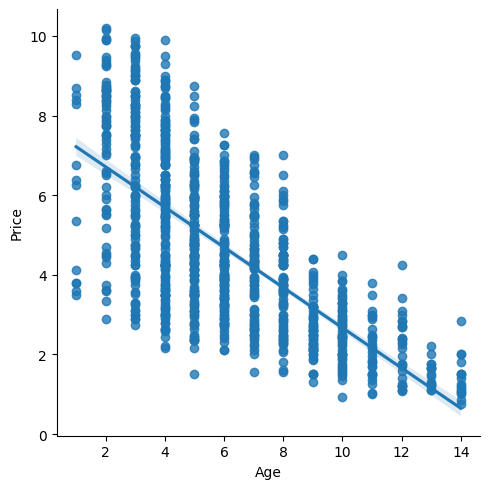

In [ ]:
sn.lmplot(data = cars_df,
          y = 'Price',
          x = 'Age',
          fit_reg = True);

### Predicting on Test Set

In [ ]:
y_pred = lreg_v1.predict(X_test)

In [ ]:
y_df = pd.DataFrame( { "actual" : y_test,
                       "predicted" : y_pred,
                       "residual": y_test - y_pred })

In [ ]:
y_df.sample(10)

,actual,predicted,residual
512,7.00,3.657193,3.342807
917,3.80,2.169960,1.630040
239,4.25,5.640171,-1.390171
311,5.35,4.648682,0.701318
40,7.15,6.631660,0.518340
264,2.60,3.161449,-0.561449
650,2.60,3.657193,-1.057193
124,4.32,5.144426,-0.824426
549,1.55,3.657193,-2.107193
24,9.90,6.631660,3.268340


### Error or Accuracy Analysis: RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_df.actual, y_df.predicted)

In [ ]:
mse

2.6451429781269318

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

np.float64(1.6263895530059616)

### What is R-squared?

R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model.

https://www.investopedia.com/terms/r/r-squared.asp


Total Variance in Y = $\sum_{i=1}^{N}(Y_{i} - \bar{Y})^2$

where,

- $\bar{Y}$ is the mean of Y.

Unexplained Variance = $\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$  


$R^{2}$ is given by:

$R^{2}$ = $\frac{Explained\ Variance}{Total\ Variance}$


Notes:

- R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%.
- What is a “good” R-squared value depends on the domain or context. In the field of social sciences, even a relatively low R-squared, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation. [Source](https://www.investopedia.com/terms/r/r-squared.asp)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_df.actual, y_df.predicted)

0.4727024035981997

### Participants Exercise: 1

Build a model by adding the following two parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven

## 3. Building a model with more variables

Based on most important questions that customers ask

- Which model is it? (categorical feature)
- How old the vehicle is?
- How many kilometers it is driven?
    

### Feature Set Selection

In [ ]:
x_features = ['Model', 'Age', 'KM_Driven']

### How to encode categorical variables?

OHE: One Hot Encoding

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [ ]:
pd.get_dummies?

In [ ]:
encoded_cars_df = pd.get_dummies(cars_df[x_features],
                                 columns = ['Model'],
                                 dtype = int)

In [ ]:
encoded_cars_df.head(5)

,Age,KM_Driven,Model_a-star,Model_alto,Model_baleno,Model_celerio,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
0,8,87,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5,64,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7,54,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,11,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
encoded_cars_df.shape

(1009, 16)

In [ ]:
len(cars_df.Model.unique())

14

### Setting X and y variables

In [ ]:
X = encoded_cars_df
y = cars_df.Price

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 40)

In [ ]:
X.shape

(1009, 16)

In [ ]:
X_train.shape

(807, 16)

In [ ]:
X_train[0:10]

,Age,KM_Driven,Model_a-star,Model_alto,Model_baleno,Model_celerio,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
158,8,96,0,0,0,0,0,0,0,0,0,1,0,0,0,0
198,9,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0
331,5,51,0,0,0,0,0,0,0,0,0,0,1,0,0,0
556,7,43,0,0,0,0,0,0,0,0,0,0,1,0,0,0
204,7,56,0,1,0,0,0,0,0,0,0,0,0,0,0,0
744,4,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0
726,6,98,0,0,0,0,0,0,0,0,0,0,1,0,0,0
570,4,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0
98,6,49,0,0,0,0,1,0,0,0,0,0,0,0,0,0
679,6,61,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test.shape

(202, 16)

## 4. Multiple Linear Regression Model


Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$

- $\beta_{0}$, $\beta_{1}$...$\beta_{n}$  are the regression coefficients

In [ ]:
lreg_v2 = LinearRegression()
lreg_v2.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [ ]:
lreg_v2.intercept_

np.float64(6.797674428948882)

In [ ]:
lreg_v2.coef_

array([-0.32510246, -0.00458647, -1.02336178, -1.86138553,  1.35119448,
       -0.98470574,  2.17690626,  1.24631711, -1.36101243,  2.18856792,
       -2.32440576, -0.43699509,  0.25826952,  3.0745239 , -1.15622224,
       -1.14769062])

In [ ]:
dict(zip(X_train.columns,
         np.round(lreg_v2.coef_, 3)))

{'Age': np.float64(-0.325),
 'KM_Driven': np.float64(-0.005),
 'Model_a-star': np.float64(-1.023),
 'Model_alto': np.float64(-1.861),
 'Model_baleno': np.float64(1.351),
 'Model_celerio': np.float64(-0.985),
 'Model_ciaz': np.float64(2.177),
 'Model_dzire': np.float64(1.246),
 'Model_eeco': np.float64(-1.361),
 'Model_ertiga': np.float64(2.189),
 'Model_omni': np.float64(-2.324),
 'Model_ritz': np.float64(-0.437),
 'Model_swift': np.float64(0.258),
 'Model_vitara': np.float64(3.075),
 'Model_wagon': np.float64(-1.156),
 'Model_zen': np.float64(-1.148)}

### Predict on test set

In [ ]:
y_pred_2 = lreg_v2.predict(X_test)

In [ ]:
y_df_2 = pd.DataFrame( {"actual": y_test,
                        "predicted": y_pred_2,
                        "residual": y_test - y_pred_2} )

In [ ]:
y_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 991 to 132
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   actual     202 non-null    float64
 1   predicted  202 non-null    float64
 2   residual   202 non-null    float64
dtypes: float64(3)
memory usage: 6.3 KB


In [ ]:
y_df_2.sample(10)

,actual,predicted,residual
1,5.60,5.136897,0.463103
31,2.65,3.218968,-0.568968
43,1.35,1.790137,-0.440137
243,3.39,3.370009,0.019991
608,8.90,6.981541,1.918459
537,2.35,2.778959,-0.428959
132,6.21,4.953976,1.256024
332,4.70,4.157003,0.542997
530,1.95,3.236734,-1.286734
383,3.10,3.763684,-0.663684


### Measuring Accuracy

In [ ]:
r2_score(y_df_2.actual, y_df_2.predicted)

0.8553137746014273

In [ ]:
mse_2 = mean_squared_error(y_df_2.actual, y_df_2.predicted)

In [ ]:
rmse_2 = np.sqrt(mse_2)
rmse_2

np.float64(0.8168926876769056)

### Participants Exercise: 2

Build a model by adding the following five parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven
- Model
- Transmission Type
- Fuel Type

## 4. Building model with all the variables

### Feature Set Selection

In [ ]:
x_features = list(cars_df.columns)

In [ ]:
x_features

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Price',
 'Age',
 'Model',
 'Mileage',
 'Power',
 'KM_Driven']

In [ ]:
x_features.remove('Price')

In [ ]:
x_features

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Age',
 'Model',
 'Mileage',
 'Power',
 'KM_Driven']

### Encoding Categorical Variables


In [ ]:
cat_features = ['Location',
                'Fuel_Type',
                'Transmission',
                'Owner_Type',
                'Model']

In [ ]:
num_features = list(set(x_features) - set(cat_features))

In [ ]:
num_features

['Seats', 'Power', 'Mileage', 'Age', 'KM_Driven']

In [ ]:
encoded_cars_df = pd.get_dummies(cars_df[x_features],
                                 columns = cat_features,
                                 dtype = int,
                                 drop_first = True)

In [ ]:
encoded_cars_df.head(5)

,Seats,Age,Mileage,Power,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
0,7,8,20.77,88.76,87,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5,5,25.20,74.00,64,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5,3,28.40,74.00,25,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,7,20.92,67.10,54,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,11,14.00,64.00,83,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
encoded_cars_df.columns

Index(['Seats', 'Age', 'Mileage', 'Power', 'KM_Driven', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third', 'Model_alto', 'Model_baleno', 'Model_celerio',
       'Model_ciaz', 'Model_dzire', 'Model_eeco', 'Model_ertiga', 'Model_omni',
       'Model_ritz', 'Model_swift', 'Model_vitara', 'Model_wagon',
       'Model_zen'],
      dtype='object')

### Setting X and y variables

In [ ]:
X = encoded_cars_df
y = cars_df.Price

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 40)

In [ ]:
X_train.shape

(807, 32)

In [ ]:
X_test.shape

(202, 32)

### Build Model

In [ ]:
lreg_v3 = LinearRegression()
lreg_v3.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [ ]:
lreg_v3.intercept_

np.float64(5.031291914787796)

In [ ]:
lreg_v3.coef_

array([ 5.38234462e-02, -2.50294997e-01,  3.60918458e-02,  8.46451988e-04,
       -1.03514001e-02,  7.08545660e-01,  1.96501120e-01,  1.08128699e+00,
       -2.62219372e-01,  8.04456940e-01,  1.63547742e-01,  4.16014051e-01,
       -7.81759322e-01, -1.59689630e-01,  3.92632263e-02, -4.12521109e-01,
       -5.20882929e-01, -1.21418659e-01, -3.01115691e-01, -7.32178020e-01,
        2.40367887e+00, -5.70749305e-02,  3.14013261e+00,  1.76025237e+00,
       -3.61521538e-01,  3.22278706e+00, -1.20353520e+00,  3.30107692e-01,
        1.33176801e+00,  3.84225521e+00,  1.98573448e-01, -7.37685691e-02])

In [ ]:
dict(zip(X_train.columns,
         np.round(lreg_v3.coef_, 3)))

{'Seats': np.float64(0.054),
 'Age': np.float64(-0.25),
 'Mileage': np.float64(0.036),
 'Power': np.float64(0.001),
 'KM_Driven': np.float64(-0.01),
 'Location_Bangalore': np.float64(0.709),
 'Location_Chennai': np.float64(0.197),
 'Location_Coimbatore': np.float64(1.081),
 'Location_Delhi': np.float64(-0.262),
 'Location_Hyderabad': np.float64(0.804),
 'Location_Jaipur': np.float64(0.164),
 'Location_Kochi': np.float64(0.416),
 'Location_Kolkata': np.float64(-0.782),
 'Location_Mumbai': np.float64(-0.16),
 'Location_Pune': np.float64(0.039),
 'Fuel_Type_Petrol': np.float64(-0.413),
 'Transmission_Manual': np.float64(-0.521),
 'Owner_Type_Second': np.float64(-0.121),
 'Owner_Type_Third': np.float64(-0.301),
 'Model_alto': np.float64(-0.732),
 'Model_baleno': np.float64(2.404),
 'Model_celerio': np.float64(-0.057),
 'Model_ciaz': np.float64(3.14),
 'Model_dzire': np.float64(1.76),
 'Model_eeco': np.float64(-0.362),
 'Model_ertiga': np.float64(3.223),
 'Model_omni': np.float64(-1.204),
 

### Predict on test set

In [ ]:
y_pred_3 = lreg_v3.predict(X_test)

In [ ]:
y_df_3 = pd.DataFrame({"actual": y_test,
                       "predicted": y_pred_3,
                       "residual": y_test - y_pred_3})

In [ ]:
y_df_3.sample(10)

,actual,predicted,residual
498,6.51,6.333572,0.176428
385,2.35,2.713091,-0.363091
383,3.10,3.430301,-0.330301
416,3.50,3.594727,-0.094727
43,1.35,1.667878,-0.317878
104,3.95,4.876025,-0.926025
14,4.45,4.370090,0.079910
181,3.30,3.113374,0.186626
287,3.60,3.663360,-0.063360
457,3.36,3.442479,-0.082479


### Measuring Accuracy: RMSE and R2

In [ ]:
r2_score(y_df_3.actual, y_df_3.predicted)

0.919238854817243

In [ ]:
mse_3 = mean_squared_error(y_df_3.actual, y_df_3.predicted)
rmse_3 = np.sqrt(mse_3)
rmse_3

np.float64(0.6103130402412233)

### What are the reasons for the remaining error?

1. More factors
2. More samples
3. Complex Models : Try other models
4. Noise (randomness)
   

### Participant Exercise: 3

Take different training set, build model and measure the model accuracy. But, how to sample differenent training and test sets?
- Change the random_state to different numbers while training and test splits and then measure the r2 values.
- Repeat the above process for 5 different random_states and make a note of the r2 values.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(LinearRegression(),
                         X,
                         y,
                         cv = 5,
                         scoring = 'r2')

In [ ]:
scores

array([0.92108715, 0.92233391, 0.92366712, 0.91025684, 0.91448105])

In [ ]:
scores.mean()

np.float64(0.9183652128858218)

## 6. Storing the model

In [ ]:
class CarPredictionModel():

    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [ ]:
my_model = CarPredictionModel(lreg_v3, list(X_train.columns), rmse_3)

In [ ]:
my_model.model

LinearRegression()

In [ ]:
my_model.rmse

np.float64(0.6103130402412233)

In [ ]:
from joblib import dump

In [ ]:
dump(my_model, 'cars.pkl')

['cars.pkl']

In [ ]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Jun 21 07:32 .
drwxr-xr-x 1 root root 4096 Jun 21 07:29 ..
-rw-r--r-- 1 root root 2384 Jun 21 07:32 cars.pkl
drwxr-xr-x 4 root root 4096 Jun 18 13:35 .config
drwxr-xr-x 1 root root 4096 Jun 18 13:35 sample_data


### KNN Model

K-Nearest Neighbors Model

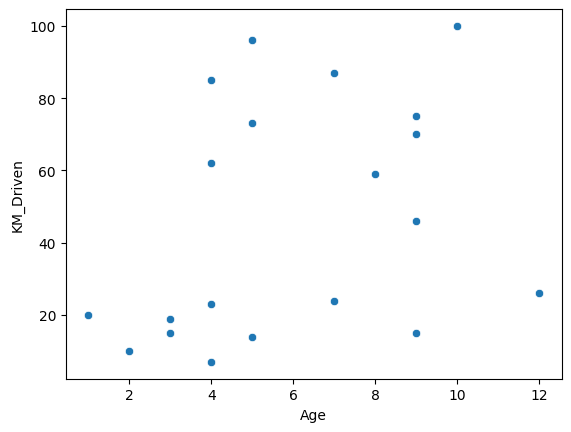

In [ ]:
sn.scatterplot(cars_df.sample(20, random_state = 40),
               x = 'Age',
               y = 'KM_Driven');

### Finding Euclidean Distance

- **Cars with very similar attributes i.e. similar age and kilometer drivern are called neighbors.**
- Similar cars will have shorter distance i.e. they will be nearer to each other on the euclidean space of age and kilometer driven compared to dissimilar cars.
- The distane between the car **x** and car **y** is given by:

$ dist_{xy}  = \sqrt {\left( age_{x}-age_{y}\right)^2 + \left( km_{x}-km_{y}\right)^2 } $

https://en.wikipedia.org/wiki/Euclidean_distance

### Scale Features

For distance calculation, we need to bring all features into same scale.

####  Min Max Scaler


In this technique, the minimum value of the feature is scaled to 0 and the maximum value is scaled to 1. All other values are scaled to a value between 0 and 1 based on their relative position to the minimum and maximum values.

$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$

[Sklearn Source](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


#### Standard Scaler

Standard scaling, also known as standardization, is a data preprocessing technique used in machine learning and data science to transform the features of a dataset so that they have a mean of 0 and a standard deviation of 1.

$X_{norm} = \frac{X_{i} - \mu}{\sigma}$

[Sklearn Source](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X[0:10]

,Seats,Age,Mileage,Power,KM_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Model_ciaz,Model_dzire,Model_eeco,Model_ertiga,Model_omni,Model_ritz,Model_swift,Model_vitara,Model_wagon,Model_zen
0,7,8,20.77,88.76,87,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5,5,25.20,74.00,64,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5,3,28.40,74.00,25,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,7,20.92,67.10,54,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,11,14.00,64.00,83,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,2,24.30,88.50,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,5,12,19.70,46.30,90,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,5,6,22.90,74.00,52,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,5,6,17.80,75.00,53,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,5,7,28.40,74.00,65,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
pd.DataFrame(X_scaled[0:10])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.666667,0.538462,0.470139,0.829179,0.517857,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.307692,0.777778,0.604863,0.380952,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.153846,1.000000,0.604863,0.148810,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.461538,0.480556,0.500000,0.321429,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.769231,0.000000,0.452888,0.494048,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.000000,0.076923,0.715278,0.825228,0.297619,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.000000,0.846154,0.395833,0.183891,0.535714,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.384615,0.618056,0.604863,0.309524,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.000000,0.384615,0.263889,0.620061,0.315476,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.000000,0.461538,1.000000,0.604863,0.386905,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

### Build a KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_v1 = KNeighborsRegressor(n_neighbors = 5)

In [ ]:
knn_v1.fit(X_train, y_train)

KNeighborsRegressor()

### Evaluate on Test Set

In [ ]:
y_pred = knn_v1.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.8217361584497931

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(0.945645392269635)

### Participant Exercise

- Change the values of K from 3 to 20
- Measure r2
- sort them by r2 values - which k is best

In [ ]:
r2_scores = []

for k in range(3, 21):
    knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

In [ ]:
knn_df = pd.DataFrame({"k" : list(range(3, 21)),
                       "r2": r2_scores})

In [ ]:
knn_df.sort_values('r2', ascending = False)

,k,r2
3,6,0.839801
1,4,0.836617
2,5,0.836343
4,7,0.835831
5,8,0.832774
0,3,0.829346
6,9,0.828763
13,16,0.824048
9,12,0.823125
14,17,0.823123
